In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [3]:
# Importing the CSV File 
df = pd.read_csv(r'C:\Users\jasik\OneDrive\Documents\Data Analysis\Data\Fraud Detection.csv')

In [4]:
# Looking at the dataset, its shape, data type and info
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
df.shape

(6362620, 11)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [15]:
df.describe(include = 'number')

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [21]:
# Renaming the Columns
data = df.rename(columns = {'newbalanceOrig' : 'newbalanceOrg'})
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrg,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [23]:
# Handling Missing Values and Duplicates
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrg     0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [25]:
data.duplicated().sum()

0

In [26]:
# Visualising the dataset

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64


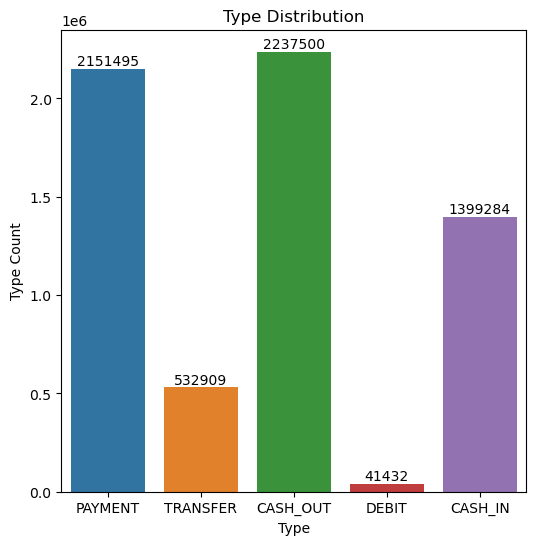

In [41]:
print(data['type'].value_counts())

plt.figure(figsize = (6, 6))
ax = sns.countplot(data, x = 'type', hue = 'type')
plt.title('Type Distribution')
plt.xlabel("Type")
plt.ylabel('Type Count')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),  
                ha='center', va='bottom', fontsize=10, color='black') 
plt.show()

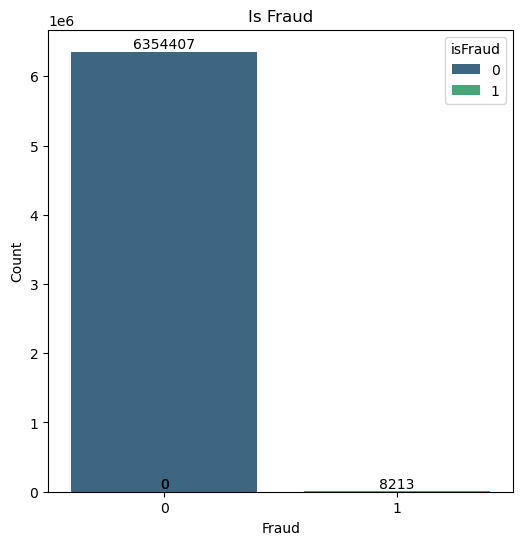

In [39]:
# Fraud Value Count
print(data['isFraud'].value_counts())

plt.figure(figsize = (6, 6))
fraud = sns.countplot(data, x = 'isFraud', hue= 'isFraud', palette='viridis')
plt.title('Is Fraud')
plt.xlabel("Fraud")
plt.ylabel('Count')

for p in fraud.patches:
    fraud.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom', color='black')
plt.show()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64


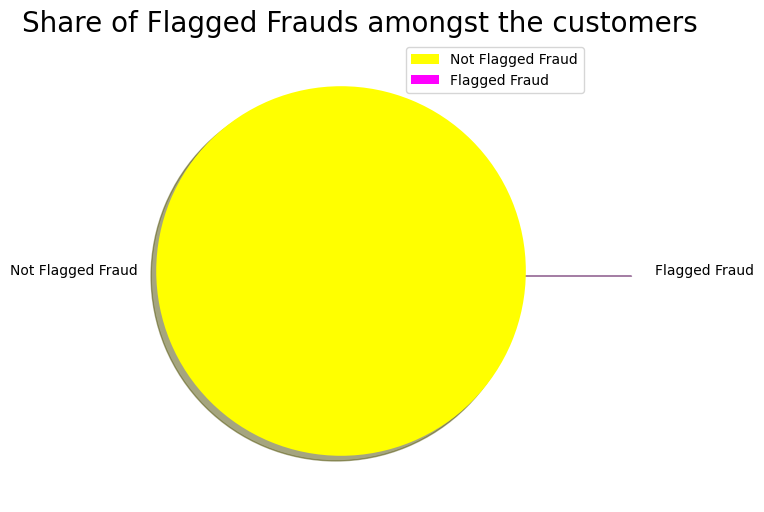

In [205]:
# Customers who are flagged fraud
print(data['isFlaggedFraud'].value_counts())

count = [6362604, 16]
label = ['Not Flagged Fraud', 'Flagged Fraud']
explode = [0.1, 0.5]

plt.rcParams['figure.figsize']= (6, 6)
plt.pie(x = count, labels = label, colors = ['yellow', 'magenta'], explode = explode, shadow = True)
plt.axis('off')
plt.title('Share of Flagged Frauds amongst the customers',fontsize = 20)
plt.legend()
plt.show()

In [57]:
# Steps involved in transaction
print('The number of different steps involved', data['step'].value_counts().nunique())

The number of different steps involved 428


C:\Users\jasik\AppData\Local\Temp\ipykernel_18916\844984820.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.step, kde = False, fit = norm, color = 'green')


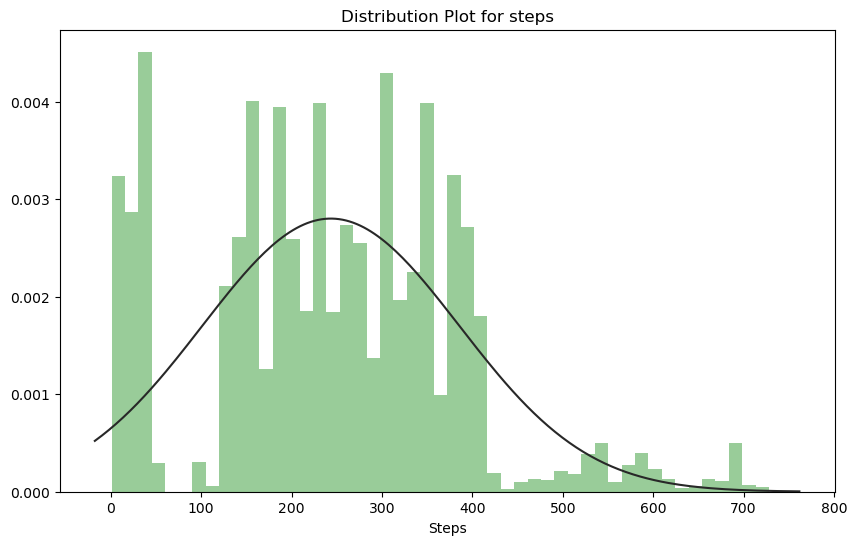

In [69]:
from scipy.stats import norm

plt.figure(figsize = (10,6))
sns.distplot(data.step, kde = False, fit = norm, color = 'green')
plt.title('Distribution Plot for steps')
plt.xlabel('Steps')
plt.show()

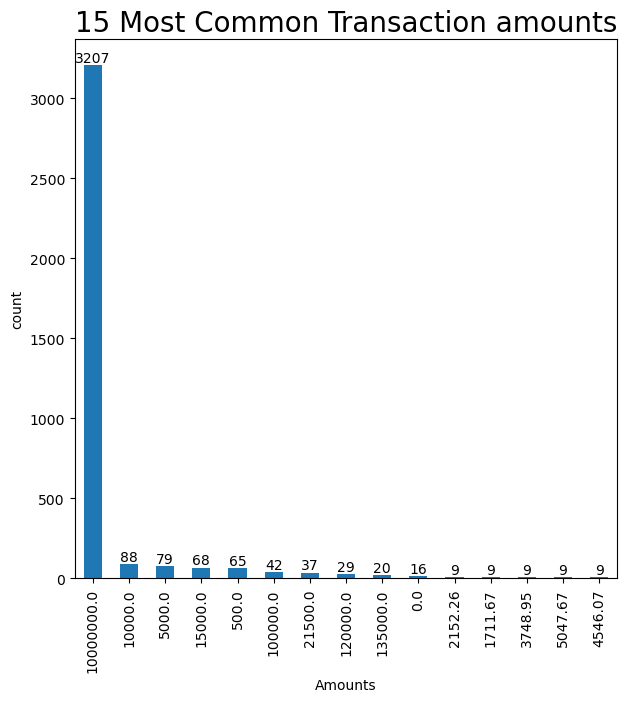

In [207]:
# Different values for amount transaction
plt.figure(figsize = (7, 7))

amt = data['amount'].value_counts().head(15).plot.bar()
plt.title('15 Most Common Transaction amounts', fontsize = 20)
plt.xlabel('Amounts')
plt.ylabel('count')

for p in amt.patches:
    amt.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom', color='black')
plt.show()

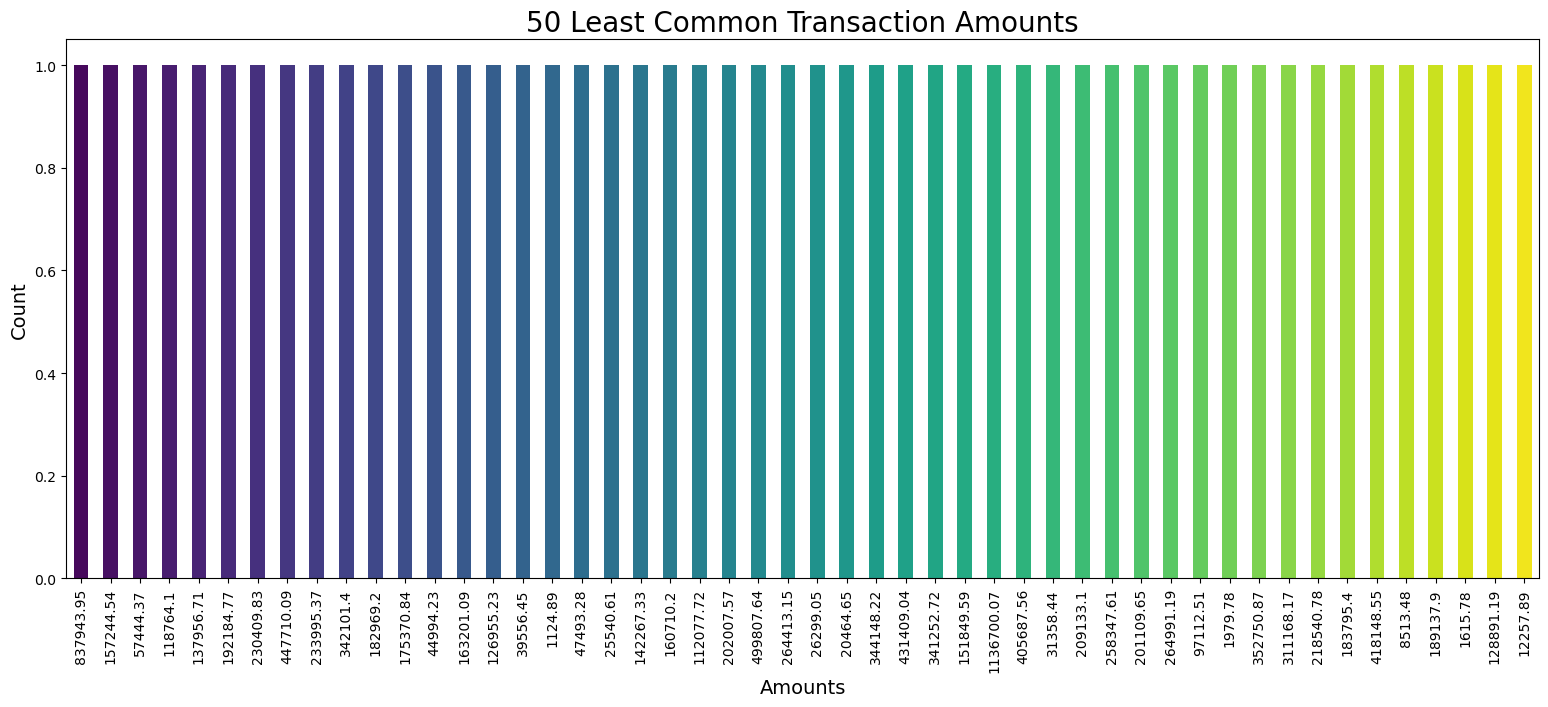

In [75]:
colors = sns.color_palette("viridis", 50)

plt.figure(figsize = (19, 7))

data['amount'].value_counts().tail(50).plot.bar(color=colors)
plt.title('50 Least Common Transaction Amounts', fontsize=20)
plt.xlabel('Amounts', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

In [79]:
# Correlation with different variables
data.corr(numeric_only = True)

,step,amount,oldbalanceOrg,newbalanceOrg,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrg,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


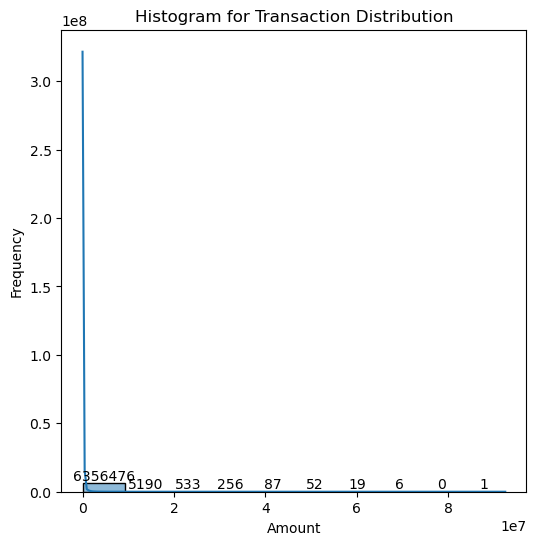

In [93]:
# Transaction Distribution

plt.figure(figsize =(6,6))
ax = sns.histplot(df, x = 'amount', kde = True, bins = 10)
plt.title('Histogram for Transaction Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom', color='black')

plt.show()

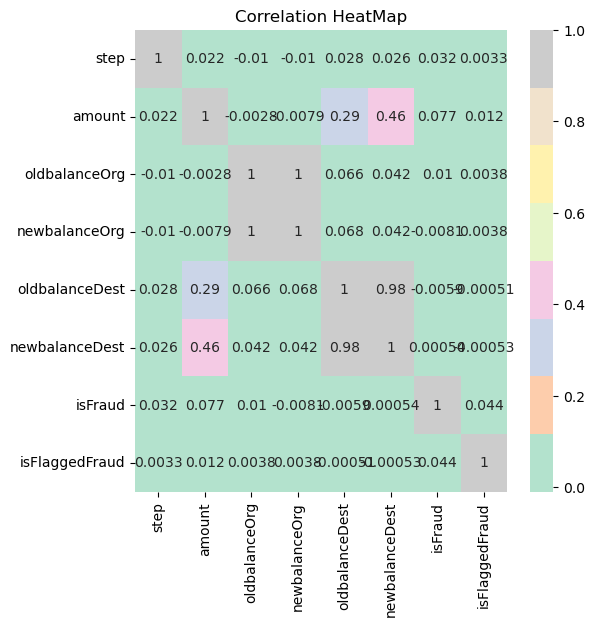

In [95]:
plt.figure(figsize = (6,6))
sns.heatmap(data.corr(numeric_only = True), annot = True, cmap = 'Pastel2')
plt.title('Correlation HeatMap')
plt.show()

In [110]:
data.loc[data.isFraud == 1].type.unique()

array(['TRANSFER', 'CASH_OUT'], dtype=object)

In [102]:
# Relationship betweeen type of transaction and amount
fraud = data.loc[data.isFraud == 1]
nonfraud = data.loc[data.isFraud == 0]

In [104]:
fraudcount = fraud.isFraud.count()
nonfraudcount = nonfraud.isFraud.count()

<Axes: >

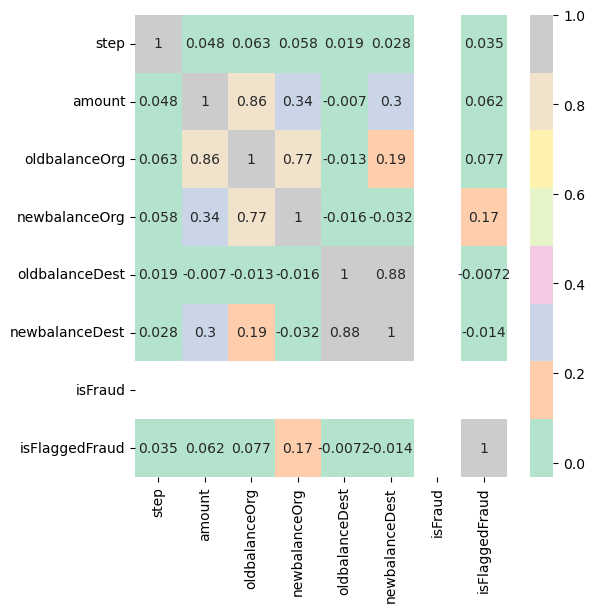

In [118]:
plt.figure(figsize = (6,6))
sns.heatmap(fraud.corr(numeric_only = True),cmap='Pastel2', annot = True)

In [126]:
# Data Analysis
print('The total number of fraud transaction is {}.'.format(data.isFraud.sum()))
print('The total number of fraud transaction which is marked as fraud {}.'.format(data.isFlaggedFraud.sum()))
print('Ratio of fraud transaction vs non-fraud transaction is 1:{}.'.format(int(nonfraudcount//fraudcount)))

The total number of fraud transaction is 8213.
The total number of fraud transaction which is marked as fraud 16.
Ratio of fraud transaction vs non-fraud transaction is 1:773.


In [128]:
print('Therefore in every 773 transaction, there is 1 fraud transaction happening.')
print('Amount lost due to these fraud transaction is ${}.'.format(int(fraud.amount.sum())))

Therefore in every 773 transaction, there is 1 fraud transaction happening.
Amount lost due to these fraud transaction is $12056415427.


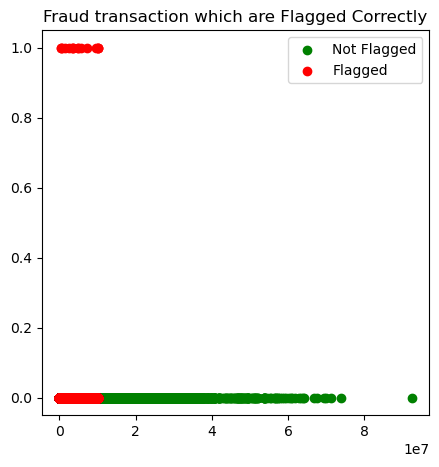

In [132]:
plt.figure(figsize = (5,5))
plt.title("Fraud transaction which are Flagged Correctly")
plt.scatter(nonfraud['amount'],nonfraud['isFlaggedFraud'],c='g')
plt.scatter(fraud['amount'],fraud['isFlaggedFraud'],c='r')
plt.legend(loc='upper right',labels=['Not Flagged','Flagged'])
plt.show()

In [140]:
# Regression Model and Statistic Tests

In [138]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [170]:
x = data.drop(['type', 'isFraud', 'nameOrig', 'nameDest'], axis = 1)
y = data['isFraud']

In [171]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [172]:
model = LogisticRegression()
model.fit(x_train, y_train)
LogisticRegression()

C:\Users\jasik\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [173]:
y_pred = model.predict(x_test)

In [176]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

In [177]:
accuracy_score(y_test, y_pred)

0.9984899302488598

In [184]:
precision_score(y_test, y_pred, pos_label=1, zero_division=1)

0.4132231404958678

In [186]:
recall_score(y_test, y_pred, pos_label=1)

0.4156479217603912

In [192]:
matrix = confusion_matrix(y_test, y_pred)
matrix

array([[1587403,    1207],
       [   1195,     850]], dtype=int64)

In [194]:
Sensitivity = matrix[1, 1] / (matrix[1, 0] + matrix[1, 1])
Sensitivity

0.4156479217603912

In [198]:
specificity = matrix[0, 0] / (matrix[0, 0] + matrix[0, 1])
specificity

0.9992402162897124

Project By : JASIKA GUPTA

LinkedIn : https://www.linkedin.com/in/jasika-gupta17/

GitHub : https://github.com/jasikagupta04/jasikagupta04


Thank You!